# HW 5
Author: Luis A. Perez

Last Updated: July 27th, 2019

In [206]:
import numpy as np
import seaborn as sns
from scipy import linalg

## Problem 1: The smoothest input that takes the state to zero.

In [12]:
# We follow the outline defined in the homework.
def solveProblem1(A, B, x0, n):
    """Solves to find the smoothest inputs u(t) such that the system:
        
        x(t + 1) = Ax(t) + Bu(t)
    
    will have x(n) = 0.
    
    B must be a vector (not matrix). A must be squared.
    """
    assert B.shape[1] == 1
    assert A.shape[0] == A.shape[1]
    CBlockColumns = []
    currA = np.identity(A.shape[0])
    for i in range(n):
        CBlockColumns.append(np.dot(currA, B))
        currA = np.dot(currA, A)
    C = np.concatenate(CBlockColumns, axis=1)
    A20 = currA
    y = -np.dot(A20, x0)
    # Upper triangular with 1s. Only applies when B is vector.
    T = np.triu(np.ones((n,n)))
    D = np.dot(C,T)
    delta = np.dot(D.T,
                   np.dot(np.linalg.inv(np.dot(D,
                                               D.T
                                              )),
                          y
                         )
                  )
    u = np.dot(T, delta)
    RMSE = 1 / np.sqrt(n) * np.linalg.norm(delta)
    print("The RMSE of the data is %s." % (RMSE))
    
    # Plot the values of u.
    ax = sns.scatterplot(x=np.arange(0,20,1), y=np.flip(u.flatten()))
    ax.set_title("Smoothed Inputs")
    ax.set(ylabel='Input Value', xlabel='Time')
    ax.get_figure().savefig('smoothed_inputs')

The RMSE of the data is 1.124615543256077.


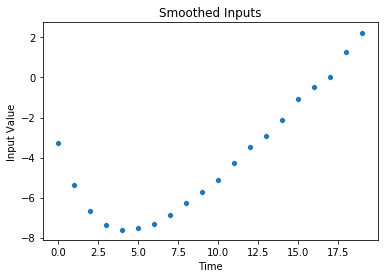

In [13]:
def getProblem1Constants():
    """Returns (A,B,x0,n) as defined for Problem 1."""
    A = np.array([
        [1.0, 0.5, 0.25],
        [0.25, 0.0, 1.0],
        [1.0, -0.5, 0.0]
    ])
    B = np.array([
        [1.0],
        [0.1],
        [0.5]
    ])
    x0 = np.array([
        [25.0],
        [0.0],
        [-25],
    ])
    return (A, B, x0, 20)
solveProblem1(*getProblem1Constants())

In [14]:
## Problem 2: Minimum fuel and minimum peak input solutions.

In [132]:
def getProblem2Inputs():
    n = 10
    A = np.array([
        list([i + 0.5 for i in range(n-1,-1, -1)]),
        [1] * n
    ])
    y = np.array([
        [1.0],
        [0.0]
    ])
    xmf = np.array([1/n] + ([0] * (n-2)) + [-1/n])
    xmf.shape = (xmf.shape[0], 1)
    return A, y, xmf, n

def solveProblem2(A, y, xmf, n):
    xls = np.dot(A.T, np.dot(np.linalg.inv(np.dot(A,A.T)), y))
    # Verify norm lf xls is < norm of xmf.
    xmfNorm = np.linalg.norm(xmf, ord=1)
    xlsNorm = np.linalg.norm(xls, ord=1)
    
    # verify norms.
    print("The $x_{\\text{ls}}$ norm is $%s$ and the $x_{\\text{mf}}$ is $%s$." % (xlsNorm, xmfNorm))
    assert xmfNorm < xlsNorm
    
    # compute xmp
    xmp = 1/25 * np.array([[1], [1], [1], [1], [1], [-1], [-1], [-1], [-1], [-1]])
    
    # verify it is a solution to our system
    assert np.allclose(y, np.dot(A, xmp))
    print("Verified x_{mf} solves system of equations.")
    
    # verify its infinitynorm is equal to what we want.
    xmpNorm = np.linalg.norm(xmp, ord=np.inf)
    lam = np.array([[1],[-5]])
    xmpMin = np.dot(lam.T, y) / np.linalg.norm(np.dot(A.T, lam), ord=1)
    assert np.allclose(xmpMin, xmpNorm)
    print("Verified infinity norm of x_{mf} is minimum.")

In [133]:
solveProblem2(*getProblem2Inputs())

The $x_{\text{ls}}$ norm is $0.3030303030303031$ and the $x_{\text{mf}}$ is $0.2$.
Verified x_{mf} solves system of equations.
Verified infinity norm of x_{mf} is minimum.


## Problem 4: Singularity of the KKT matrix

In [140]:
def getProblem4Inputs():
    # data for sector neutral portfolio selection problem

    # number of assets
    n = 40
    # number of sectors
    k = 10
    # risk aversion parameter
    lam = 1.000000e-01

    # asset mean returns
    mu = np.array([
        [-5.724206e-03],
        [-5.738256e-02],
        [-2.066057e-02],
        [3.954949e-02],
        [6.380350e-02],
        [-3.452340e-02],
        [-4.097040e-03],
        [-4.511063e-02],
        [3.559544e-02],
        [8.854415e-02],
        [-6.551461e-02],
        [-1.581188e-01],
        [-1.900198e-01],
        [-6.725867e-02],
        [-9.943040e-02],
        [1.582090e-02],
        [6.838301e-02],
        [-5.363577e-02],
        [-4.637255e-02],
        [2.441328e-01],
        [-5.528427e-02],
        [-5.774056e-02],
        [-3.624141e-02],
        [-1.385253e-01],
        [2.113887e-01],
        [4.293215e-02],
        [-7.668623e-02],
        [-1.267691e-01],
        [3.765783e-03],
        [1.465808e-01],
        [2.710706e-02],
        [6.954837e-03],
        [-1.363490e-01],
        [1.100747e-01],
        [-2.595972e-01],
        [7.837806e-02],
        [-5.963350e-02],
        [-9.465257e-03],
        [1.992940e-01],
        [1.081944e-02],
   ])

    # standard deviations of asset returns 
    sigmas = np.array([
        [2.412026e-01],
        [9.836163e-02],
        [8.892398e-02],
        [3.176707e-01],
        [2.709629e-01],
        [4.297720e-01],
        [3.454919e-01],
        [4.021115e-01],
        [4.301839e-01],
        [2.693837e-01],
        [2.073825e-01],
        [1.649149e-01],
        [3.137776e-01],
        [3.958668e-01],
        [1.851636e-01],
        [1.934122e-01],
        [3.474158e-01],
        [4.082042e-01],
        [4.021908e-01],
        [2.399173e-01],
        [1.282238e-01],
        [3.599238e-01],
        [2.555882e-01],
        [3.498137e-01],
        [2.583165e-01],
        [2.955634e-01],
        [1.470161e-01],
        [2.495283e-01],
        [2.775099e-01],
        [3.687146e-01],
        [3.448759e-01],
        [1.207333e-01],
        [4.334230e-01],
        [2.956466e-01],
        [2.185491e-01],
        [4.060458e-01],
        [1.539531e-01],
        [3.900593e-01],
        [3.492380e-01],
        [3.201460e-01],
    ])

    # factor loading matrix
    F = np.array([
        [0,4.513325e-01,0,0,0,0,0,0,0,0,-8.628490e-01,0,0,-2.130824e-01,0,0,0,-9.870088e-01,4.896617e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.034245e-01],
        [-6.983963e-01,0,0,0,0,0,0,0,0,0,0,0,0,-2.609618e-01,-3.376236e-01,0,0,0,-1.018224e+00,0,0,-4.260414e-01,0,0,0,0,0,0,0,0,1.647923e+00,-1.701690e-01,1.186121e+00,0,0,0,0,-7.491083e-01,0,0],
        [0,0,0,8.362688e-01,0,0,0,-1.302310e+00,0,0,9.234870e-01,-2.280104e-01,0,0,0,-1.579673e+00,0,0,0,1.350863e-01,0,0,0,-7.194333e-02,0,0,0,-5.103924e-02,0,1.286124e+00,0,1.403337e+00,5.818706e-01,0,0,0,0,0,0,0],
        [1.649524e+00,0,0,0,0,0,-1.628774e+00,0,0,0,0,0,0,2.098262e+00,0,0,0,-6.024618e-02,0,0,-2.261465e+00,0,0,0,0,-3.065255e-01,0,0,0,0,0,0,0,-9.055355e-01,0,0,0,0,0,0],
        [0,0,0,-2.626506e-01,0,0,0,0,0,0,0,0,0,8.142265e-01,0,0,0,0,0,0,0,4.042442e-01,0,-1.182284e+00,0,0,0,0,-1.249714e+00,3.571231e-01,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,2.333656e+00,0,0,1.356463e+00,0,0,0,0,0,-1.472593e-01,0,0,0,-8.897301e-01,1.278745e+00,0,0,0,0,0,0,0,-5.706142e-01,0,0,-1.976974e+00,1.676693e+00,6.995117e-01,0,-3.134126e-02,0,1.440315e-01,0,0,0,0],
        [0,0,-1.664936e+00,0,0,0,0,0,0,0,0,0,0,0,0,1.144839e+00,3.378373e-01,0,1.821861e+00,0,0,0,0,0,1.048065e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,5.284124e-02,0,5.585971e-02,0,0,0,0,1.805302e+00,0,0,0,0,1.203747e+00,-2.717106e-01,0,0,0,0,0,0,-2.150712e+00,0,0,0,0,0,0,0,0,0,-3.022067e-01,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,9.337716e-01,0,0,0,0,0,0,6.322444e-01,0,0,0,0,0,0,1.508306e-01,0,0,1.569423e+00,0,1.411575e+00,0,0,0,0,0,0,0],
        [0,0,0,0,-4.240209e-01,0,-1.161277e+00,-9.835142e-01,0,-4.623882e-01,0,0,0,0,0,0,0,9.714951e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,9.088481e-01,-2.979568e-01,0,0,0,0,0,3.631312e-02,0],
    ])
    
    return n,k,lam, mu, sigmas, F


In [264]:
def solveProblem4(n, k, lam, mu, sigmas, F):
    Sigma = np.diag(sigmas.flatten() ** 2)
    One = np.ones((n,1))
    row1 = np.concatenate([2 * lam * Sigma, One.copy(), F.T.copy()], axis=1)
    row2 = np.concatenate([One.T, np.zeros((1, 1 + k))],axis=1)
    row3 = np.concatenate([F, np.zeros((k, 1 + k))], axis=1)
    A = np.concatenate([row1, row2, row3])
    
    y = np.concatenate([mu, [[1]], np.zeros((k,1))])
    x = np.dot(np.linalg.inv(A), y)
    optimalPortfolio = x[:n]
    print("The optimal portfolio is presented below:")
    print(optimalPortfolio.shape)
    # print(optimalPortfolio)
    print("The return associated with this portfolio is r = %s." % (
        np.dot(mu.T, optimalPortfolio)))
    print("The idiosyncratic risk is: %s." % (np.dot(np.dot(optimalPortfolio.T, Sigma), optimalPortfolio)))
    
    # Verify that 1^Tx = 1
    assert np.allclose(np.dot(One.T, optimalPortfolio), 1)
    # Verify R^{fact} = Fx = 0
    assert np.allclose(np.dot(F, optimalPortfolio), 0)

In [265]:
solveProblem4(*getProblem4Inputs())

The optimal portfolio is presented below:
(40, 1)
The return associated with this portfolio is r = [[26.70627504]].
The idiosyncratic risk is: [[133.62972408]].


## Problem 6: Controlling a system using the initial conditions

In [ ]:
def getProblem6Inputs():
    t = 10
    A = np.array([
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [-2, 1, 0, 0],
        [1, -1, 0, 0]
    ])
    expA = linalg.expm(t * A)
    E = expA[:, 2:]
    assert E.shape == (4, 2)
    return E

In [208]:
E = getProblem6Inputs()

### Part (a)

In [236]:
alpha = E[1,:].T * 1 / np.dot(E[1,:], E[1,:].T) * 2

In [237]:
alpha

array([ 2.46135192, -9.46473528])

In [238]:
np.dot(E[1,:],alpha)

2.0

### Part (b)

In [239]:
alpha = np.dot(np.linalg.inv(E[:2,:]), np.array([[1],[2]]))

In [240]:
alpha

array([[ -6.44083425],
       [-11.77979348]])

In [241]:
np.dot(E[:2,:], alpha)

array([[1.],
       [2.]])

### Part (c)

In [242]:
q = np.array([[1],[2],[0],[0]])
alpha = np.dot(np.linalg.inv(np.dot(E.T, E)), np.dot(E.T, q))

In [243]:
alpha

array([[-0.13614458],
       [-0.34345832]])

In [246]:
np.dot(E, alpha)

array([[ 0.01627571],
       [ 0.06097153],
       [-0.23927003],
       [-0.27746388]])

In [247]:
# Compute the RMSE
np.linalg.norm(q - np.dot(E, alpha))

2.204944721263555

### Part (d)

In [248]:
def getProblem6Inputs2():
    t = 10
    A = np.array([
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [-2, 1, 0, 0],
        [1.0/1.3, -1.0/1.3, 0, 0]
    ])
    expA = linalg.expm(t * A)
    E = expA[:, 2:]
    assert E.shape == (4, 2)
    return E

In [250]:
Ep = getProblem6Inputs2()

In [257]:
A = np.stack((E[1,:], Ep[1,:]))
alpha = np.dot(np.linalg.inv(A), np.array([[2],[2]]))

In [258]:
alpha

array([[10.78304166],
       [-7.30063808]])

In [259]:
np.dot(A, alpha)

array([[2.],
       [2.]])